In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill"].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df


df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
481,2025-03-17,950,AT,me,1,0
482,2025-03-17,30,maggie,food,2,0
483,2025-03-17,20,juice,food,2,0
484,2025-03-16,144,milk,utility,1,0
485,2025-03-18,45,pani puri,food,2,0
486,2025-03-18,104,milk,utility,1,0
487,2025-03-18,100,petrol-jupyter,travel,1,0
488,2025-03-18,200,petrol-activa,travel,2,0
489,2025-03-19,20,chocolate,food,2,0
490,2025-03-19,70,mogu-mogu,food,2,0


## total spend

In [2]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()


a = total_spent(df)
a

np.float64(3425.0)

# top spends

In [3]:
a = df[["Date", "Amount", "Item", "Category"]]
a.loc[:, "Amount"] = a["Amount"] / df["Split"]
a.sort_values(by="Amount", ascending=False)

/tmp/ipykernel_481/1401979835.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[950.   15.   10.  144.   22.5 104.  100.  100.   10.   35.  104.   10.
 120.   35.  100.   30.  320.  150.  182.   81.   10.   20.   18.   35.
  52.5 104.   30.   45.  104.  100.  200.  104. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a.loc[:, "Amount"] = a["Amount"] / df["Split"]


,Date,Amount,Item,Category
481,2025-03-17,950.0,AT,me
497,2025-03-22,320.0,grapes,utility
511,2025-03-27,200.0,Screen,utility
499,2025-03-24,182.0,breakfast,utility
498,2025-03-23,150.0,haircut,utility
484,2025-03-16,144.0,milk,utility
493,2025-03-21,120.0,Food,food
486,2025-03-18,104.0,milk,utility
491,2025-03-21,104.0,Milk,utility
506,2025-03-25,104.0,milk,utility


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d


d = categorical(df)
d

,Amount
Category,
food,478.0
me,950.0
travel,400.0
utility,1597.0


## plot

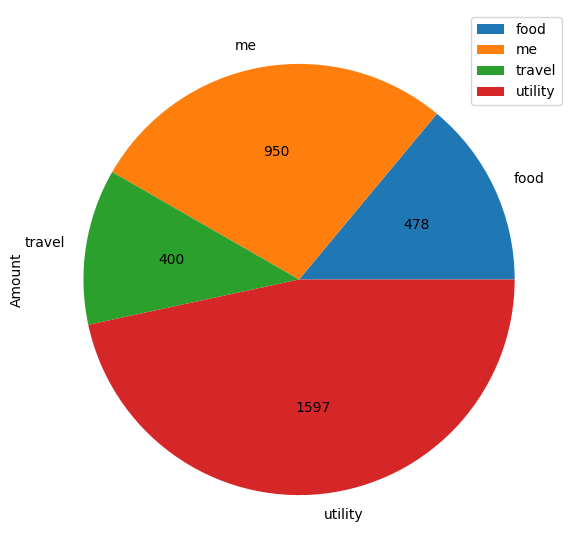

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))


plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2025-03-16,144
2025-03-17,1000
2025-03-18,449
2025-03-19,90
2025-03-21,694
2025-03-22,320
2025-03-23,150
2025-03-24,409
2025-03-25,209


## plot


<Figure size 900x900 with 0 Axes>

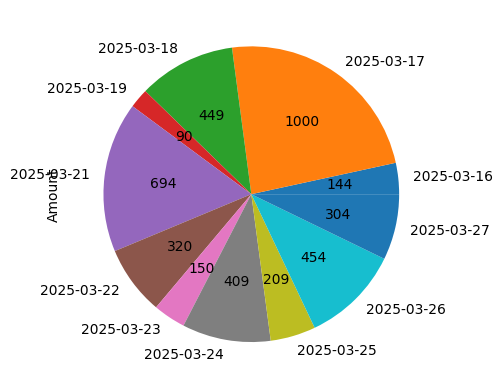

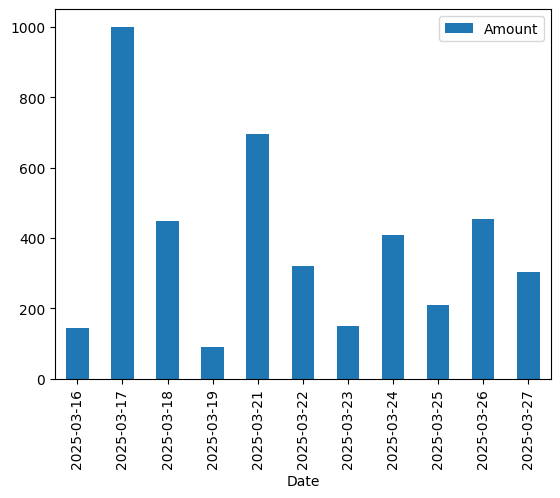

In [7]:
plt.figure(figsize=(9, 9))
try:
    d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
    d.plot(kind="bar")
except:
    pass

## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

798.0


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1 : refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)


e = no_of_refills_ago(1)
e

,Amount
Category,
all,5000.0


## common items

In [10]:
import pandas as pd


def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)


most_common_item()

Item
milk          47
petrol        35
chocolate     33
vegetables    28
refill        13
              ..
Icecream       1
Munch          1
Xerox          1
Mogu mogu      1
Screen         1
Name: count, Length: 169, dtype: int64


# All time - starting sep 2022

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()

np.float64(184572.1666666667)

# Month Wise

In [12]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
2     23840.000000
3      9393.000000
4      6557.500000
5      9096.000000
6      6799.500000
7      7773.000000
8      9305.166667
9      8535.500000
11    17272.500000
Name: Amount, dtype: float64